# HW10 (제출기한-5월31일 금요일 18시)
Datascience 모듈 연습을 위한 문제입니다. 
- 반드시 수업시간 배운 내용만을 사용하여 코드를 작성합니다. 
- 한 셀에 여러줄의 코드를 사용해도 무방합니다.
- <font color=red> 반드시 출력셀의 결과가 예시와 동일하게 출력되도록 코드를 작성하시오. (불필요한 출력을 하는 코드를 작성하지 마시오) </font>

제출시 다음 사항에 유의하기 바랍니다.
- 텍스트 셀에 설명되어 있는 각 문항을 잘 읽은 뒤,
- 코드 셀에 적절한 코드를 작성하기 바랍니다.
- 작성 후 파일명에 ``학번``을 명시후 지정한 공유폴더에 업로드합니다.
- 이때, 공유를 반드시 profkwon@cicweb.ulsan.ac.kr 에게만 합니다.


In [0]:
from datascience import *
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
import numpy as np

### 주사위 눈의 수를 나타내는 Table 변수 ``model``를 이용하자.

In [0]:
values = make_array(1,2,3,4,5,6)
model = Table().with_column('Dice', values)

### 문제1
주사위를 ``n``번 던진 후 주사위 눈의 수 *평균값*을 구하는 함수 avgdice를 작성하시오.

(위 ``model`` Table을 이용하여 sampling한다)

In [0]:
def avgdice(n):
  sampling = model.sample(n)
  return sampling.column('Dice').mean()

In [91]:
avgdice(10)

3.4

### 문제2
위 ``avgdice`` 함수를 이용하여 주사위를 10번 던진 후 주사위 눈의 평균값을 구하는 시행을 10000번 시행하여 그 값들을 ``avg_ten`` 배열 변수에 저장하시오. 

In [0]:
avg_ten = make_array()

for i in range(10000):
  avg_ten = np.append(avg_ten, avgdice(10))

In [93]:
avg_ten

array([3.1, 3.9, 3.2, ..., 3.7, 3.5, 3.6])

### 문제3
문제 2와 마찬가지로 위 avgdice 함수를 이용하여 주사위를 **100**번 던진 후 주사위 눈의 평균값을 구하는 시행을 10000번 시행하여 그 값들을 avg_hund 배열 변수에 저장하시오. 

In [0]:
avg_hund = make_array()

for i in range(10000):
  avg_hund = np.append(avg_hund, avgdice(100))

In [95]:
avg_hund

array([3.43, 3.66, 3.3 , ..., 3.73, 3.25, 3.9 ])

### 문제4
위 ``avg_ten``, ``avg_hund`` 배열을 column으로 지정하여 ``results``라는 Table을 생성하시오. 

(단, 각 column의 이름은 ``average_10``과 ``average_100``으로 정하시오.)

In [0]:
results = Table().with_columns('average_10',avg_ten,'average_100',avg_hund)

In [97]:
results

average_10,average_100
3.1,3.43
3.9,3.66
3.2,3.3
3.3,3.73
4.3,3.6
3.5,3.45
3.8,3.36
3.5,3.94
3.7,3.4
2.5,3.72


### 문제5
위 ``results`` Table의 두 column을 중첩하여 histogram을 그리시오.

(단, bins의 개수는 20개로 설정한다.)


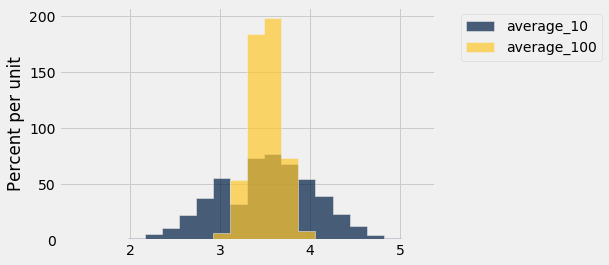

In [98]:
results.hist(bins=20)

### 보너스문제
위 데이터에 대하여 본인이 출제하고 싶은 문제가 있으면 한 문제를 출제하고 아래에 답안 코드를 작성하시오.

위에서 구한 results에 대하여 average_10과 average_100이 가지는 최댓값, 최솟값이 평균값으로부터 SD기준으로 얼마나 떨어져 있는지를 확인하라

(deviations 제곱의 평균 = Variance, Variance의 루트 = sd = Standard Deviation)

In [0]:
mean_10 = np.mean(results.column('average_10'))
std_10 = np.std(results.column('average_10'))

sd_max_10 = ((results.sort('average_10', descending=True).take(0).column(0))-mean_10)/std_10
sd_min_10 = ((results.sort('average_10').take(0).column(0))-mean_10)/std_10

mean_100 = np.mean(results.column('average_100'))
std_100 = np.std(results.column('average_100'))

sd_max_100 = ((results.sort('average_100', descending=True).take(0).column(1))-mean_100)/std_100
sd_min_100 = ((results.sort('average_100').take(0).column(1))-mean_100)/std_100

In [100]:
sd_max_10, sd_min_10, sd_max_100, sd_min_100

(array([3.14764509]),
 array([-3.89626438]),
 array([3.80432502]),
 array([-3.58087651]))